# Battery Current State Analysis and Visualization

Analyzes and visualizes the current state of battery cells during operation. It processes MATLAB data files to classify and plot the current state (charging, discharging, or idle) of battery cells throughout their testing cycles.

The expected result is to generate a graph showing the current state transitions and create a 'estado' field on the dataset. This field will be 1 when the battery is charging, 0 when idle and -1 when discharging.

To run the notebook, you need to have the CU_Dynamic folder in this directory.

In [5]:
from create_state_functions import *
from json import load

In [7]:
# Process all .mat files and generate JSON files with 'estado'
process_all_cells("CU_Dynamic")

In [8]:
# Choose a sample cell for analysis
sample_file = "CU000/BW-VTC-458_7068_CU_cyc_000_BW-VTC-AgeVal.mat"

# Load raw MATLAB data
data = load_cell_data(f"CU_Dynamic/{sample_file}")

# Load the generated 'estado' JSON for the same cell
with open(f"Edited_dics/CU000/BW-VTC-458_7068_CU_cyc_000_BW-VTC-AgeVal.json", "r") as f:
    estado = load(f)


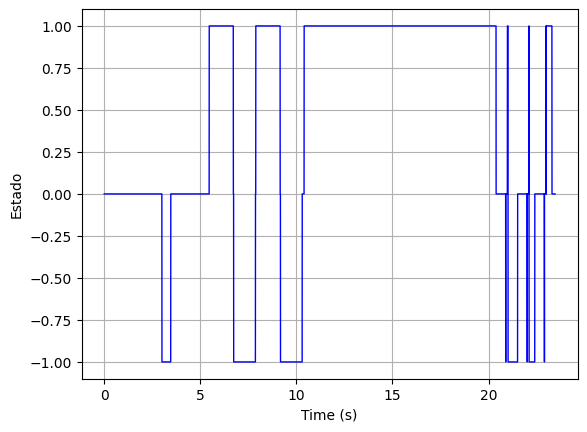

In [9]:
# Plot estado vs time for the selected cell
plot_estado_over_time(data, estado)